# Hierarchical/Agglomerative Clusting

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score, davies_bouldin_score

import random
import numpy as np

SEED = 42


In [2]:
merged_df = pd.read_csv('merged_df.csv')
display(merged_df)

,id,ts,platform,ms_played,track_name,artist_name,album_name_x,reason_start,reason_end,shuffle,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,...,6.0,-5.101,1.0,0.0572,0.0656,0.000000,0.1570,0.610,157.974,200080.0
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,...,9,-4.175,0,0.0514,0.0469,0.000062,0.0525,0.530,128.062,240347.0
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,...,4,-6.639,0,0.0339,0.2220,0.000082,0.2770,0.379,86.020,285400.0
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,...,4,-5.562,0,0.0523,0.0621,0.002820,0.2780,0.113,160.125,299934.0
4,50VNvhzyaSplJCKWchN7a8,2013-07-08 03:17:52,web player,63485,Impossible,James Arthur,Impossible,clickrow,clickrow,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145134,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,...,2.0,-22.480,1.0,0.0000,0.6180,0.694000,0.0000,0.000,0.000,7229.0
145135,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,...,9,-9.065,1,0.0931,0.0385,0.000040,0.0734,0.338,170.962,170107.0
145136,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,...,2,-14.670,1,0.0326,0.5980,0.000181,0.8260,0.367,92.001,300200.0
145137,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,...,9,-11.384,0,0.0354,0.6380,0.000505,0.0998,0.604,84.026,292013.0


In [3]:
# drop all nan or missing values
df = merged_df.dropna().copy()
print(df['time_window'].unique())
print("\n", len(df))

['12AM–3AM' '3AM–6AM' '6AM–9AM' '9PM–12AM' '6PM–9PM' '9AM–12PM' '3PM–6PM'
 '12PM–3PM']

 34759


In [4]:
display(df)

,id,ts,platform,ms_played,track_name,artist_name,album_name_x,reason_start,reason_end,shuffle,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,...,9,-4.175,0,0.0514,0.046900,0.000062,0.0525,0.530,128.062,240347.0
10,4iG2gAwKXsOcijVaVXzRPW,2013-07-08 03:22:54,web player,1763,Time to Pretend,MGMT,Oracular Spectacular,clickrow,nextbtn,False,...,2,-3.249,1,0.0452,0.000087,0.077700,0.3000,0.421,100.990,261000.0
11,19K3lUMJmOdeuOBTrbLm19,2013-07-08 03:33:38,web player,45712,Weekend Wars,MGMT,Oracular Spectacular,nextbtn,nextbtn,False,...,5,-3.993,1,0.0361,0.096400,0.000024,0.3220,0.690,77.013,250773.0
12,5nv854ey1k43KaZ0kHmE4Z,2013-07-08 03:37:30,web player,228021,The Youth,MGMT,Oracular Spectacular,nextbtn,unknown,False,...,5,-5.886,1,0.0290,0.122000,0.005400,0.3300,0.468,111.012,228013.0
13,3FtYbEfBqAlGO46NUDQSAt,2013-07-08 03:41:21,web player,229589,Electric Feel,MGMT,Oracular Spectacular,trackdone,trackdone,False,...,1,-3.714,1,0.0350,0.071400,0.280000,0.3480,0.559,103.038,229640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145126,0KiZHfashmXDOeUFuxfviV,2024-12-15 23:06:03,android,10672,Color Esperanza,Diego Torres,Mis Favoritas,fwdbtn,fwdbtn,True,...,7.0,-6.698,1.0,0.0518,0.292000,0.000000,0.0944,0.770,100.936,263773.0
145131,2BdBVq6So5sBCbALS2p1rR,2024-12-15 23:06:15,android,4216,I'm the Only Hell My Mama Ever Raised,Willie Nelson,First Rose of Spring,fwdbtn,fwdbtn,True,...,7,-7.705,1,0.0266,0.202000,0.019000,0.0575,0.793,103.966,251853.0
145133,52dm9op3rbfAkc1LGXgipW,2024-12-15 23:06:18,android,1562,Wild Horses - 2009 Mix,The Rolling Stones,Sticky Fingers,fwdbtn,fwdbtn,True,...,7,-6.517,1,0.0255,0.687000,0.010700,0.0788,0.158,139.506,341773.0
145137,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,...,9,-11.384,0,0.0354,0.638000,0.000505,0.0998,0.604,84.026,292013.0


In [5]:
# features that will be used in clustering
features = ['time_window', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 
            'acousticness','instrumentalness', 'valence', 'tempo']

# encode categorical values for every 3 hours in time_window
time_order = ['12AM–3AM', '3AM–6AM', '6AM–9AM', '9AM–12PM', '12PM–3PM', '3PM–6PM','6PM–9PM', '9PM–12AM']
cat = pd.Categorical(df['time_window'], categories=time_order, ordered=True)

# Encode to number
df['times_encoded'] = cat.codes
print(df[['time_window', 'times_encoded']].value_counts())

# get random sample of dataset to reduce number of records for hierarchical/agglomerative clustering
random_df = df.sample(n=3000, random_state=SEED)
print(len(random_df))

time_window  times_encoded
12AM–3AM     0                7127
9PM–12AM     7                6419
6PM–9PM      6                6153
3AM–6AM      1                5418
3PM–6PM      5                4267
6AM–9AM      2                3363
12PM–3PM     4                1179
9AM–12PM     3                 833
Name: count, dtype: int64
3000


In [6]:
# features that will be used in clustering
#print(df.dtypes)
X = random_df[['times_encoded', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'valence', 'tempo']]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3 clusters: {0: 2995, 2: 4, 1: 1}
4 clusters: {0: 2984, 1: 11, 2: 4, 3: 1}
8 clusters: {0: 2974, 2: 10, 1: 6, 3: 4, 6: 3, 7: 1, 5: 1, 4: 1}

2 clusters -> Silhouette: 0.589, DB: 0.298
3 clusters -> Silhouette: 0.495, DB: 0.439
4 clusters -> Silhouette: 0.501, DB: 0.458



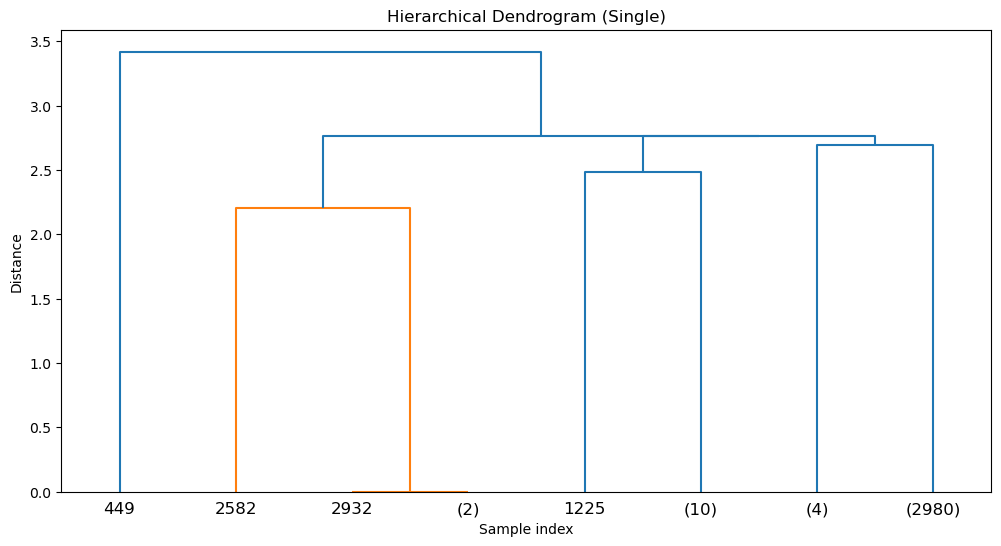

In [7]:
# Single linkage
for k in [3,4,8]:
    h_cluster = AgglomerativeClustering(n_clusters=k, linkage='single')
    labels = h_cluster.fit_predict(X_scaled)
    print(f"{k} clusters:", pd.Series(labels).value_counts().to_dict())

print()

for k in [2,3,4]:
    agglo = AgglomerativeClustering(n_clusters=k, linkage='single')
    labels = agglo.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    print(f"{k} clusters -> Silhouette: {sil:.3f}, DB: {db:.3f}")
    
print()

# dendrogram
linked = linkage(X_scaled, method='single')

plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='level', p=3)
plt.title("Hierarchical Dendrogram (Single)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

3 clusters: {1: 2484, 2: 427, 0: 89}
4 clusters: {0: 2484, 2: 427, 1: 73, 3: 16}
8 clusters: {1: 1077, 2: 1077, 0: 427, 7: 255, 5: 75, 4: 38, 6: 35, 3: 16}

2 clusters -> Silhouette: 0.425, DB: 1.094
3 clusters -> Silhouette: 0.298, DB: 1.167
4 clusters -> Silhouette: 0.290, DB: 1.267



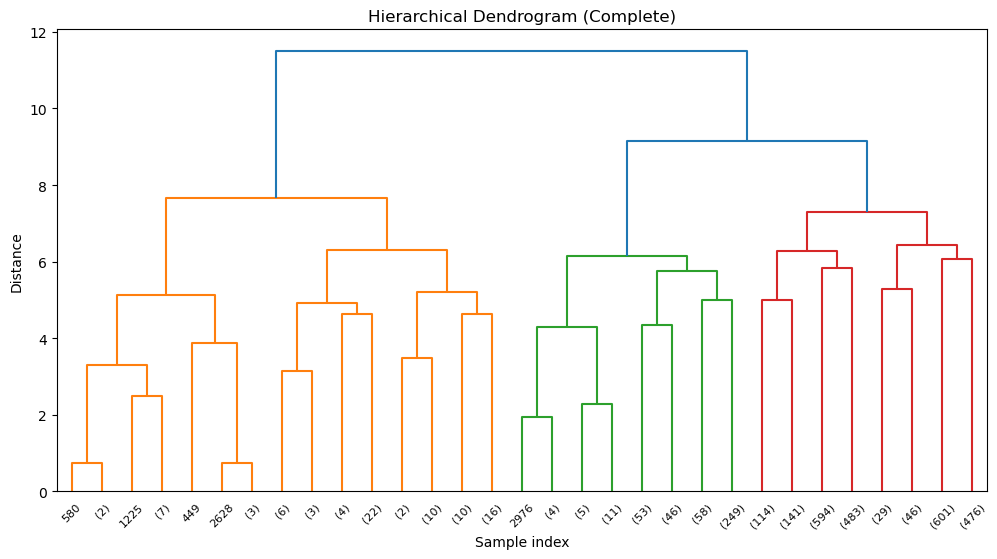

In [8]:
# Complete linkage
for k in [3,4,8]:
    h_cluster = AgglomerativeClustering(n_clusters=k, linkage='complete')
    labels = h_cluster.fit_predict(X_scaled)
    print(f"{k} clusters:", pd.Series(labels).value_counts().to_dict())

print()

for k in [2,3,4]:
    agglo = AgglomerativeClustering(n_clusters=k, linkage='complete')
    labels = agglo.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    print(f"{k} clusters -> Silhouette: {sil:.3f}, DB: {db:.3f}")
    
print()

# dendrogram
linked = linkage(X_scaled, method='complete')

plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='level', p=4)
plt.title("Hierarchical Dendrogram (Complete)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

In [9]:
# Ward linkage
for k in [3,4,8]:
    h_cluster = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = h_cluster.fit_predict(X_scaled)
    print(f"{k} clusters:", pd.Series(labels).value_counts().to_dict())
    
print()

for k in [2,3,4]:
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agglo.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    print(f"{k} clusters -> Silhouette: {sil:.3f}, DB: {db:.3f}")

3 clusters: {0: 2039, 1: 803, 2: 158}
4 clusters: {1: 1096, 3: 943, 0: 803, 2: 158}
8 clusters: {0: 863, 1: 562, 6: 381, 3: 368, 4: 246, 5: 233, 7: 189, 2: 158}

2 clusters -> Silhouette: 0.234, DB: 1.589
3 clusters -> Silhouette: 0.247, DB: 1.469
4 clusters -> Silhouette: 0.158, DB: 1.738


The silhouette scores close to 0 show there may be some overlap in the clustering. A lower Davies Bouldin is better so 3 clusters seems to be the best parameter for this dataset for all linkage types. Complete linkage seems to perform a little better than ward while single has better scores. Single however leads to chaining so I don't think we should use that.

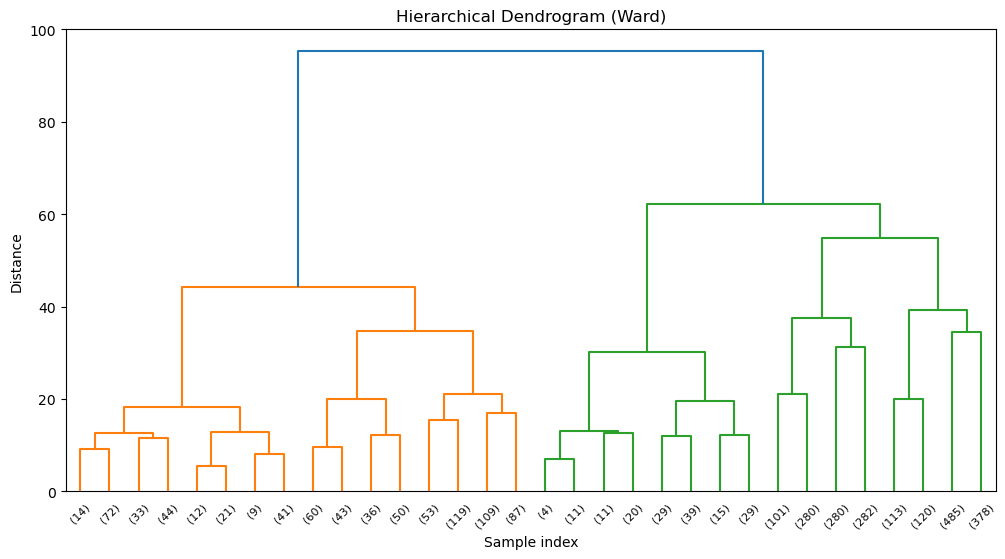

In [10]:
# dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='level', p=4)
plt.title("Hierarchical Dendrogram (Ward)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


Looks like we have 3 good clusters maybe 4 in this sample of 3000 rows in the data. Changing the 3000 randomly picked samples fluctuates between 3 and 4, so need to look at other metrics as well.

In [11]:
complete_cluster = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_labels = complete_cluster.fit_predict(X_scaled)

random_df['cluster_label_complete'] = complete_labels
print(random_df['cluster_label_complete'].value_counts())

print()

ward_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
ward_labels = ward_cluster.fit_predict(X_scaled)

random_df['cluster_label_ward'] = ward_labels
print(random_df['cluster_label_ward'].value_counts())

cluster_label_complete
1    2484
2     427
0      89
Name: count, dtype: int64

cluster_label_ward
0    2039
1     803
2     158
Name: count, dtype: int64


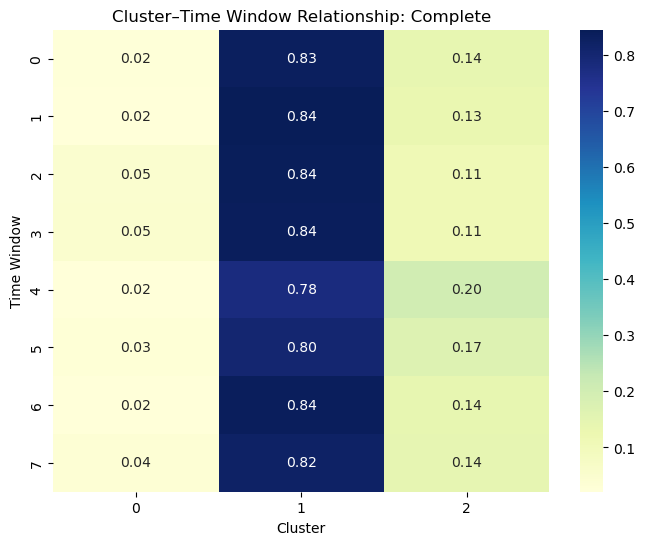

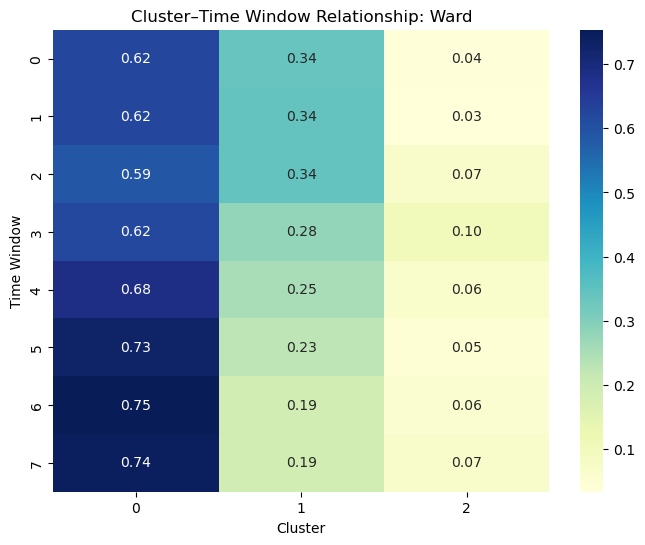

In [12]:
# time windows and cluster relationships: 0 = 12AM-3AM and so on
# complete
heat = pd.crosstab(random_df['times_encoded'], random_df['cluster_label_complete'], normalize='index')

plt.figure(figsize=(8,6))
sns.heatmap(heat, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Cluster–Time Window Relationship: Complete')
plt.xlabel('Cluster')
plt.ylabel('Time Window')
plt.show()


# ward
heat = pd.crosstab(random_df['times_encoded'], random_df['cluster_label_ward'], normalize='index')

plt.figure(figsize=(8,6))
sns.heatmap(heat, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Cluster–Time Window Relationship: Ward')
plt.xlabel('Cluster')
plt.ylabel('Time Window')
plt.show()


### Complete obviously doesn't give us much to go off of so the rest of the analysis will be done with the ward linkage method.

Only 3000 samples taken from the data: Heatmap shows that using the given features (energy, loudness, speechiness, acousticness, valence, and tempo) do have some mild patterns accross times. 

- Cluster 0 contains songs that are more common after 12PM but some overlap occurs in the morning as well. I think it is safe to say more music is listened to overall as the day goes on.

- Cluster 1 songs are more common in the ealry morning and decrease over the course of a day. 

- Cluster 2 is minimal and probably is tracking outliers.

From here we don't know which song attributes are causing these differences.

### Can we see which attributes are causing the largest effect?

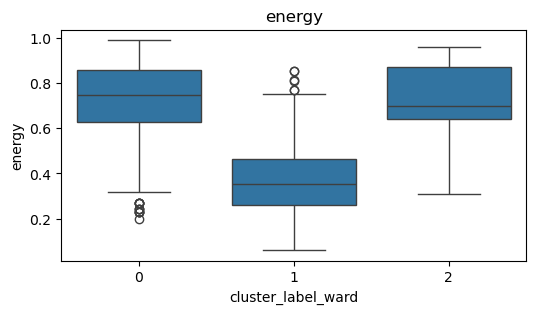

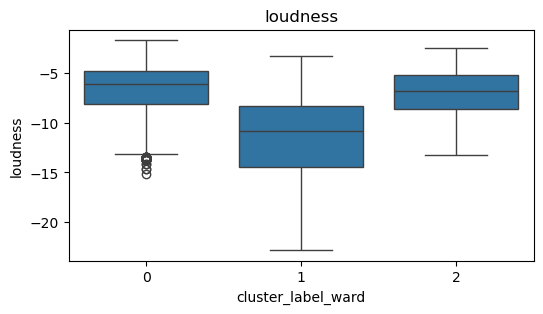

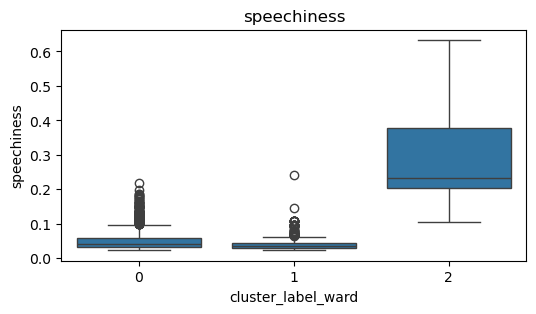

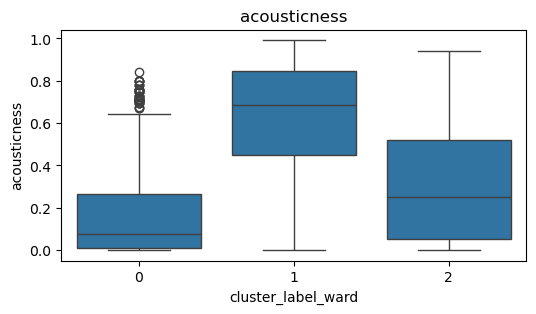

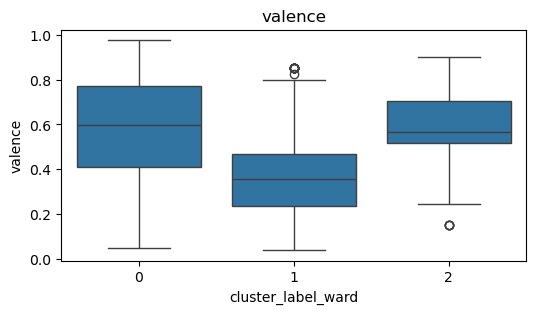

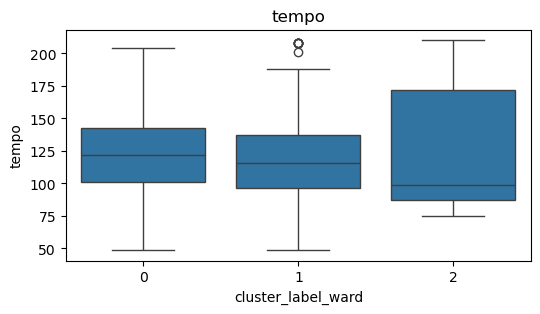

In [13]:
song_attributes = ['energy','loudness','speechiness','acousticness','valence','tempo']

# get means and medians aggregated by cluster labels
cluster_means = random_df.groupby('cluster_label_ward')[song_attributes].mean()
cluster_medians = random_df.groupby('cluster_label_ward')[song_attributes].median()
# print("Means:\n", cluster_means)
# print("Medians:\n", cluster_medians)

# Heatmap of mean feature values per cluster
# plt.figure(figsize=(8,4))
# sns.heatmap(cluster_means.T, annot=True, fmt=".2f", cmap='vlag')
# plt.title("Cluster feature means")
# plt.xlabel("Cluster")
# plt.ylabel("Feature")
# plt.show()

# boxplots for each feature comparing clusters
cols = ['energy','loudness','speechiness','acousticness','valence','tempo']
for col in cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='cluster_label_ward', y=col, data=random_df)
    plt.title(col)
    plt.show()

The above box plots show the mean distributions of the song attributes in each cluster. Tempo seems to stay about the same throughout the day in all clusters. Valence, energy, and loudness are lower in cluster 1 than cluster 0 which makes sense for earlier morning playback. An interesting note is the speechiness of songs in cluster 2 is much higher. May need to look into this more.

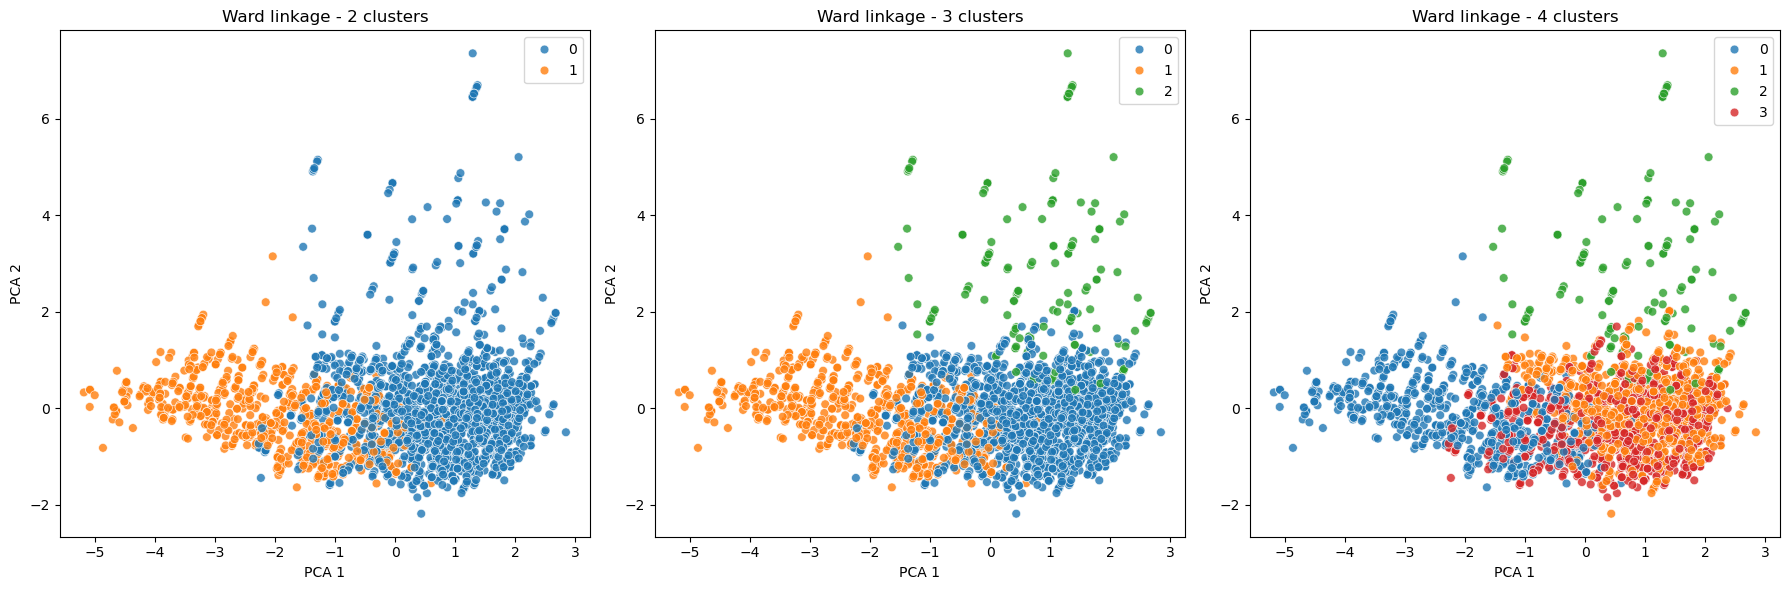

In [14]:
# PCA
pca_df = df.sample(n=3000, random_state=SEED)
pca_X = pca_df[['times_encoded', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'valence', 'tempo']]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 3, figsize=(18,6))

for ax, k in zip(axes, [2, 3, 4]):
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agglo.fit_predict(X_scaled)
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels,
                    palette='tab10', s=40, alpha=0.8, ax=ax)
    ax.set_title(f'Ward linkage - {k} clusters')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')

plt.tight_layout()
plt.show()


We do see some separation from PCA but quite a bit of overlap which was expected with the silhouette scores closer to 0 than 1. Either 3 or 4 does the best clustering. I'm wondering if DBSCAN would show something interesting here?

,PC1,PC2,PC3
times_encoded,-0.032484,-0.094285,0.945632
energy,0.593240,0.024317,0.007416
loudness,0.543629,-0.141283,-0.035797
speechiness,0.117264,0.772276,0.133101
acousticness,-0.511242,0.231543,0.052282
valence,0.248188,0.489950,0.095269
tempo,0.121495,-0.283699,0.273711


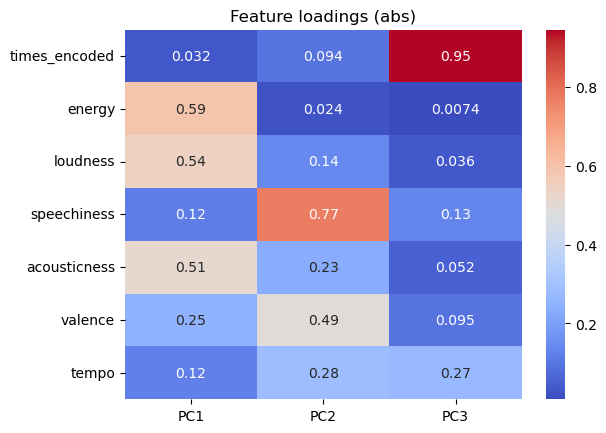

In [15]:
loadings = pd.DataFrame(pca.components_.T,
                        index=['times_encoded','energy','loudness','speechiness','acousticness','valence','tempo'],
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)])
display(loadings)

# heatmap: used absolute values to better compare the components having the largest effects
sns.heatmap(loadings.abs(), annot=True, cmap='coolwarm')
plt.title('Feature loadings (abs)'); plt.show()

PC1 is most affected by the energy, loudness, and acousticness of the songs. Given what we know about these 3 attributes, I think it's safe to say this principle component is most affected by the song tone/energy. 

PC2 is most affected by the speechiness and valence. 

PC3 is interesting because this is the only component that is largely affected by the time windows and minimally influenced by tempo. This indicates that the songs in this cluster are not really distinguishable and may include more outliers than anything else. Our times are not really affecting the outcomes of our other PC's and time windows may not be a good clustering addition overall.

## Extra scatter plots of each attribute over time

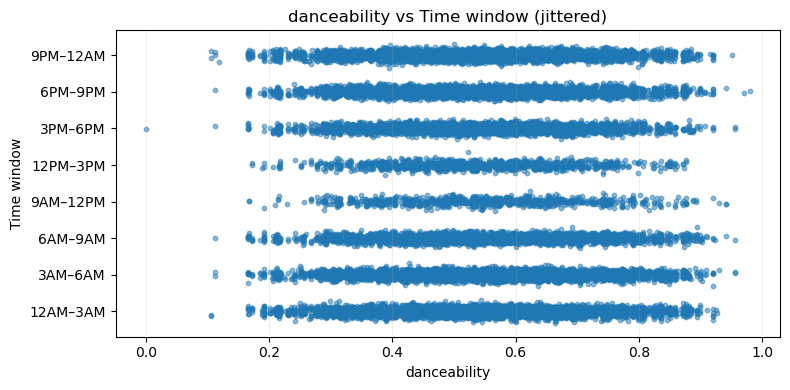

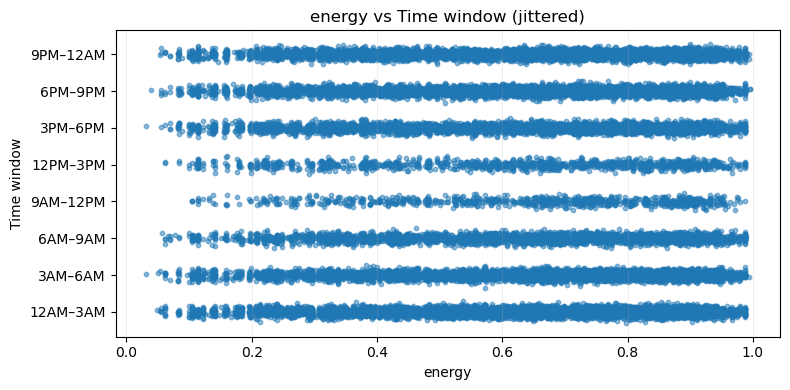

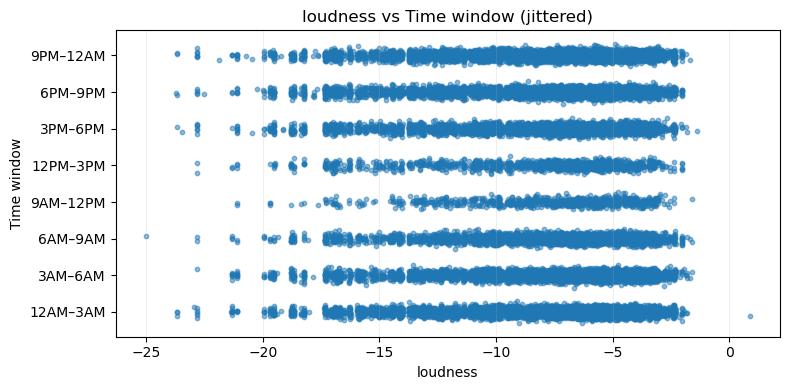

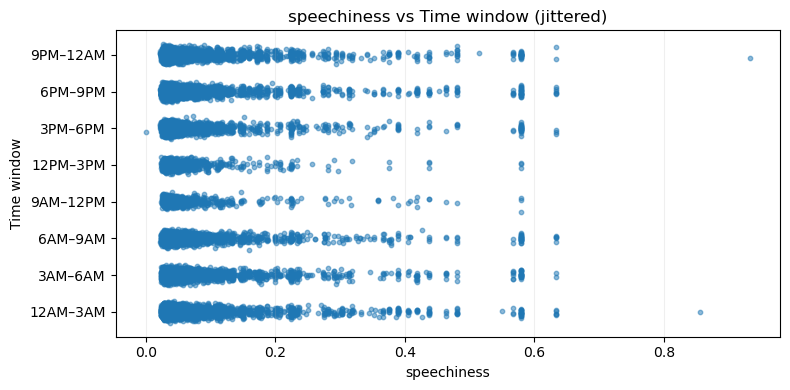

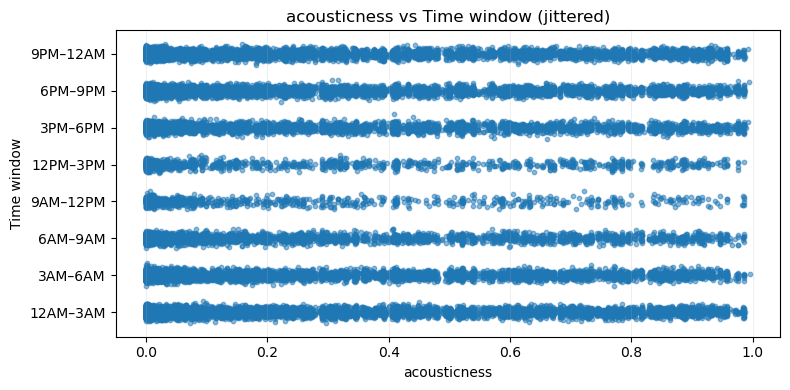

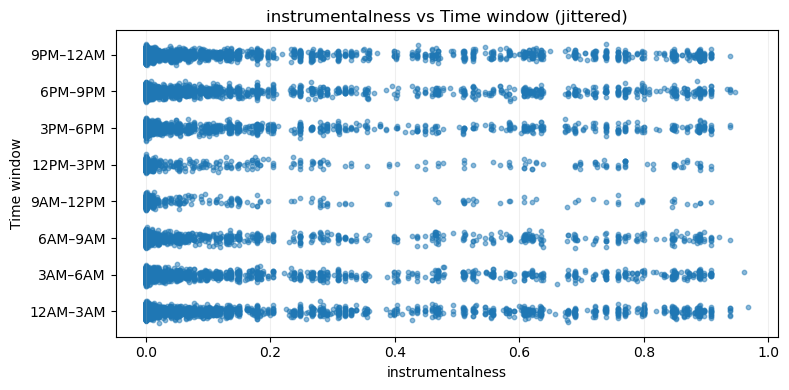

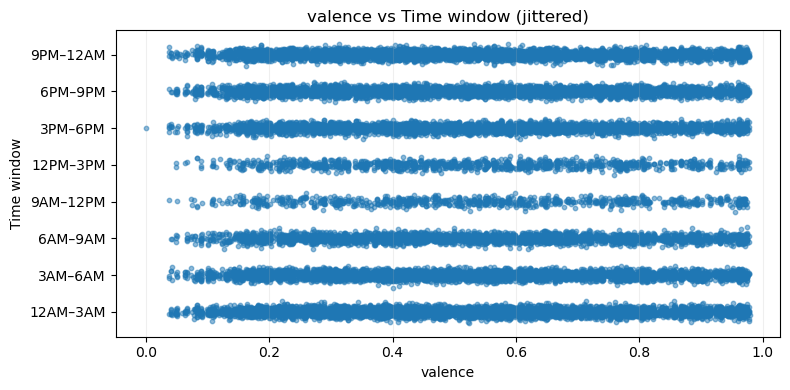

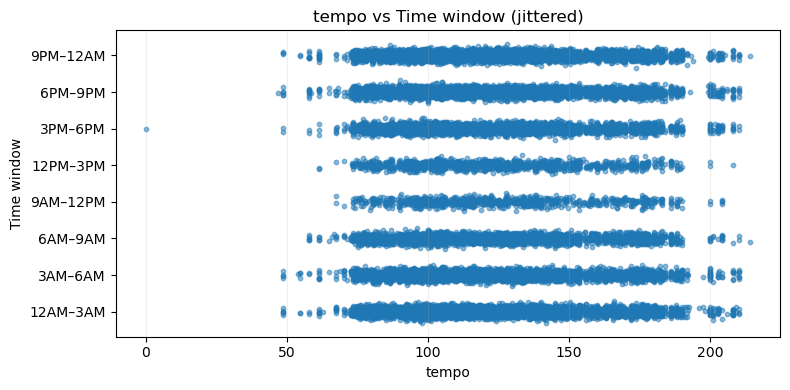

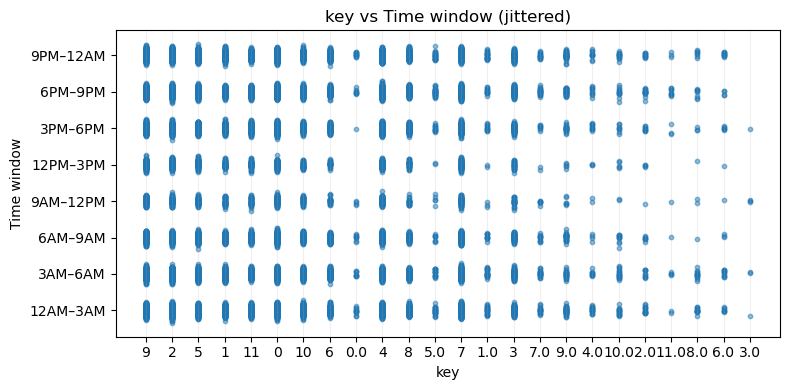

In [16]:
# scatter plots
# ...existing code...
# scatter: x = attribute, y = times_encoded (one figure per attribute)
attrs = ['danceability','energy','loudness','speechiness',
         'acousticness','instrumentalness','valence','tempo','key']

time_order = ['12AM–3AM','3AM–6AM','6AM–9AM','9AM–12PM',
              '12PM–3PM','3PM–6PM','6PM–9PM','9PM–12AM']

# ensure times_encoded exists
if 'times_encoded' not in df.columns:
    cat = pd.Categorical(df['time_window'], categories=time_order, ordered=True)
    df['times_encoded'] = cat.codes

rng = np.random.RandomState(SEED)

for attr in attrs:
    plot_df = df.dropna(subset=[attr, 'time_window']).copy()
    if plot_df.empty:
        print(f"no data for {attr}, skipping")
        continue

    y_jitter = plot_df['times_encoded'].values + rng.normal(loc=0, scale=0.08, size=len(plot_df))
    x_vals = plot_df[attr].values

    plt.figure(figsize=(8,4))
    plt.scatter(x_vals, y_jitter, s=10, alpha=0.5, color='tab:blue')
    plt.yticks(ticks=range(len(time_order)), labels=time_order)
    plt.xlabel(attr)
    plt.ylabel('Time window')
    plt.title(f'{attr} vs Time window (jittered)')
    plt.grid(axis='x', alpha=0.2)
    plt.tight_layout()
    plt.show()
# ...existing code...

### Hierarchical Clustering (Aggregated by Song Name)

Aggregating by song name...
Original shape: (34759, 28)
Aggregated shape: (2868, 12)


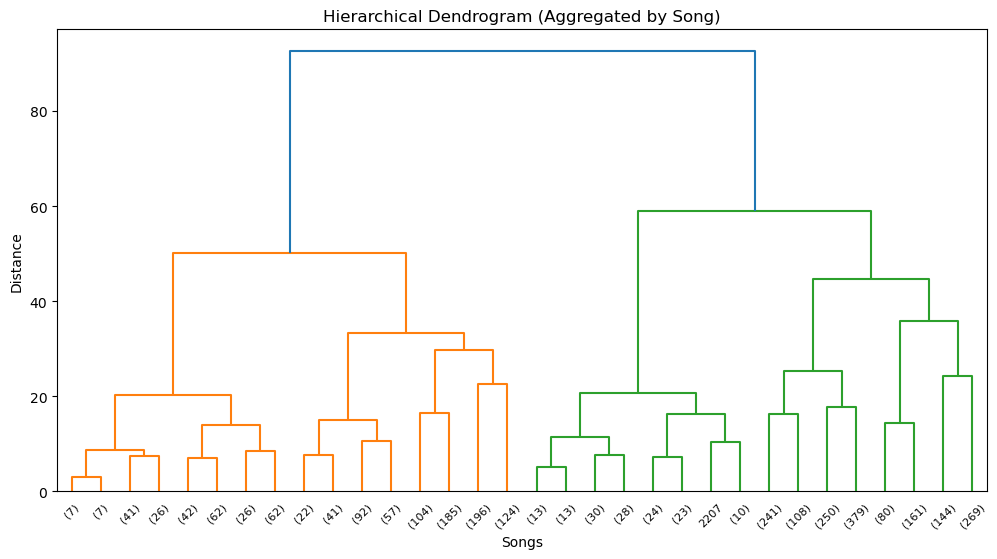

2 clusters -> Silhouette: 0.235, DB: 1.576
3 clusters -> Silhouette: 0.251, DB: 1.343
4 clusters -> Silhouette: 0.195, DB: 1.523


In [30]:
# agg by song name
print("Aggregating by song name...")

# selecting numeric cols
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# groupby track name, avg numeric features
df_agg = df.groupby(['track_name'])[numeric_cols].mean().reset_index()

print("Original shape:", df.shape)
print("Aggregated shape:", df_agg.shape)

# features to use in clustering
X_agg = df_agg[['energy', 'loudness', 'speechiness', 
                'acousticness', 'valence', 'tempo']]

# scaling data
scaler = StandardScaler()
X_agg_scaled = scaler.fit_transform(X_agg)

# hierarchical clustering - ward
linked_agg = linkage(X_agg_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(linked_agg, truncate_mode='level', p=4)
plt.title("Hierarchical Dendrogram (Aggregated by Song)")
plt.xlabel("Songs")
plt.ylabel("Distance")
plt.show()

# evaluation (silhouette and db)
for k in [2, 3, 4]:
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agglo.fit_predict(X_agg_scaled)
    sil = silhouette_score(X_agg_scaled, labels)
    db = davies_bouldin_score(X_agg_scaled, labels)
    print(f"{k} clusters -> Silhouette: {sil:.3f}, DB: {db:.3f}")

Aggregating by song name...
Original shape: (34759, 28)
Aggregated shape: (8827, 13)


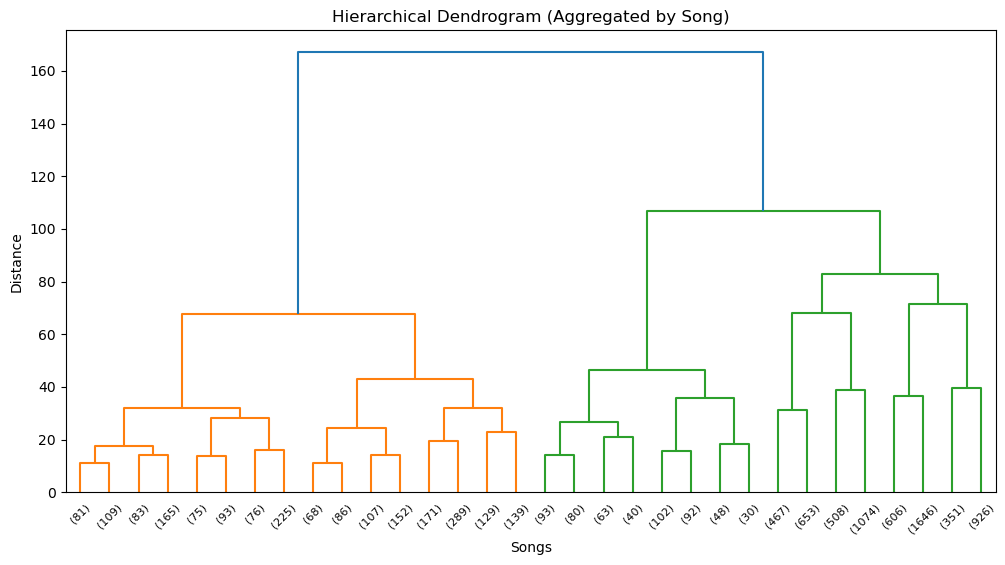

2 clusters -> Silhouette: 0.296, DB: 1.296
3 clusters -> Silhouette: 0.306, DB: 1.258
4 clusters -> Silhouette: 0.155, DB: 1.769


In [38]:
# agg by song name and time_window
print("Aggregating by song name...")

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# groupby track name, avg numeric features
df_agg = df.groupby(['track_name', 'time_window'])[numeric_cols].mean().reset_index()

print("Original shape:", df.shape)
print("Aggregated shape:", df_agg.shape)

X_agg = df_agg[['energy', 'loudness', 'speechiness', 
                'acousticness', 'valence', 'tempo']]

scaler = StandardScaler()
X_agg_scaled = scaler.fit_transform(X_agg)

# hierarchical clustering - ward
linked_agg = linkage(X_agg_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(linked_agg, truncate_mode='level', p=4)
plt.title("Hierarchical Dendrogram (Aggregated by Song)")
plt.xlabel("Songs")
plt.ylabel("Distance")
plt.show()

# evaluation (silhouette and db)
for k in [2, 3, 4]:
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agglo.fit_predict(X_agg_scaled)
    sil = silhouette_score(X_agg_scaled, labels)
    db = davies_bouldin_score(X_agg_scaled, labels)
    print(f"{k} clusters -> Silhouette: {sil:.3f}, DB: {db:.3f}")


Based on the above, we see that 3 clusters seem to be the sweet spot given a silhouette score of 0.306 and DB of 1.258. We see an improvement in about SS and DB when aggregating on both track_name and time_window versus only track_name. Note that the aggregation was applied via track_name and time_window, where the clustering is done on a song/time of day combination instead of song + musical properties. As such, we see repeated track_names with different time_windows (as seen below).

In [39]:
pd.set_option('display.max_columns', None)
display(df_agg)

,track_name,time_window,ms_played,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,"""Was He Slow?"" - Music From The Motion Picture...",3AM–6AM,106880.0,0.754,0.719,-5.806,0.3710,0.3730,0.259000,0.1200,0.674,175.990,106880.0
1,'39 - Remastered 2011,6AM–9AM,110157.0,0.524,0.571,-9.686,0.0273,0.0271,0.000000,0.1110,0.373,101.626,210800.0
2,(I Can't Get No) Satisfaction - Mono Version,3PM–6PM,222813.0,0.723,0.863,-7.890,0.0338,0.0383,0.031700,0.1280,0.931,136.302,222813.0
3,(I Can't Get No) Satisfaction - Mono Version,6PM–9PM,222813.0,0.723,0.863,-7.890,0.0338,0.0383,0.031700,0.1280,0.931,136.302,222813.0
4,(I Just) Died In Your Arms,9AM–12PM,280400.0,0.625,0.726,-11.402,0.0444,0.0158,0.000169,0.0625,0.507,124.945,280400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8822,¿Cómo Fue?,3AM–6AM,175040.0,0.578,0.269,-11.073,0.0405,0.7810,0.243000,0.1020,0.421,98.515,175040.0
8823,Échame La Culpa,12AM–3AM,173720.0,0.733,0.892,-3.641,0.0417,0.0376,0.000000,0.1370,0.675,95.989,173720.0
8824,Échame La Culpa,12PM–3PM,173720.0,0.733,0.892,-3.641,0.0417,0.0376,0.000000,0.1370,0.675,95.989,173720.0
8825,Échame La Culpa,3AM–6AM,173720.0,0.733,0.892,-3.641,0.0417,0.0376,0.000000,0.1370,0.675,95.989,173720.0


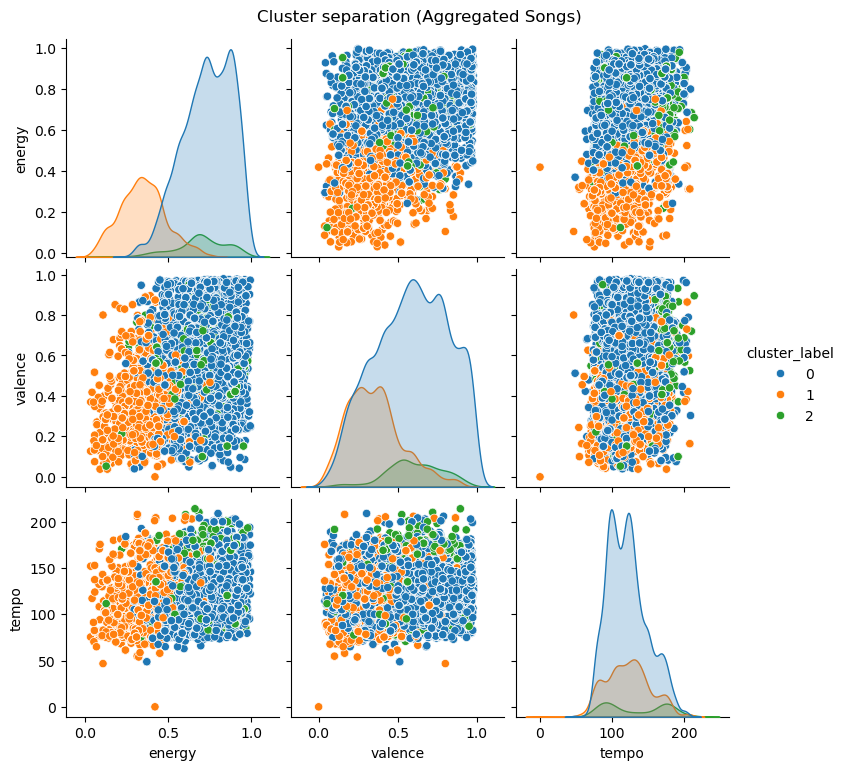

In [40]:
df_agg['cluster_label'] = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(X_agg_scaled)

sns.pairplot(df_agg, vars=['energy', 'valence', 'tempo'], hue='cluster_label', palette='tab10')
plt.suptitle("Cluster separation (Aggregated Songs)", y=1.02)
plt.show()

Based on the pairplot, we see that the energy vs valance plot is dominated by the blue points, likely indicating high-energy/valence/upbeat songs. We see overlap in the tempo dimension, while valance and energy charts are more defining features for the clusters. Perhaps we're seeing upbeat/energtic, calm/chill mood, and balanced songs for cluster 0, 1, and 2 respectively. 

C:\Users\gaowe\AppData\Local\Temp\ipykernel_16876\1489274357.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg.groupby(['time_window', 'cluster_label']).size().unstack().reindex(time_order).plot(


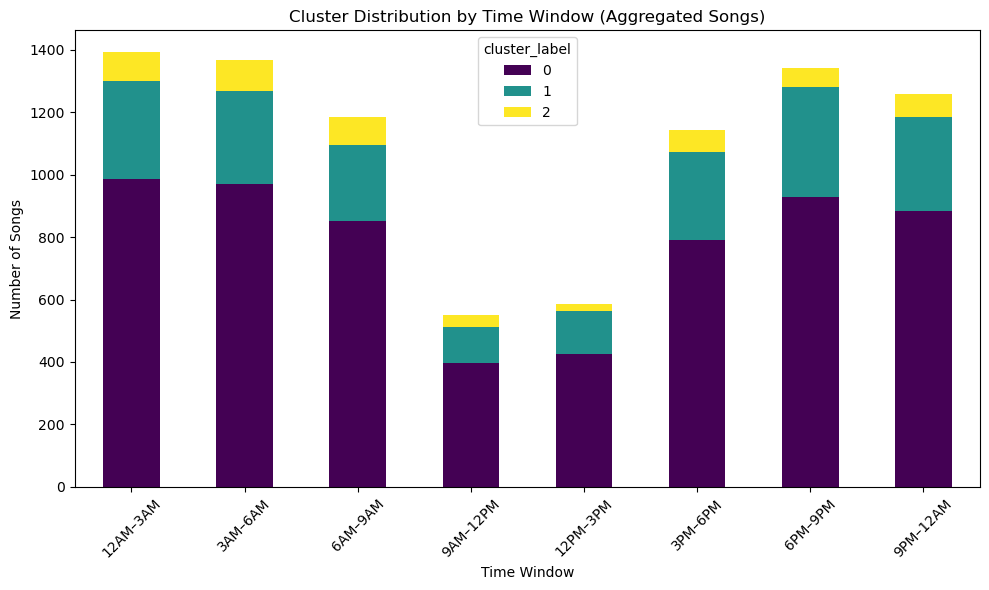

In [41]:
# correct chronological order for time_window
time_order = [
    '12AM–3AM',
    '3AM–6AM',
    '6AM–9AM',
    '9AM–12PM',
    '12PM–3PM',
    '3PM–6PM',
    '6PM–9PM',
    '9PM–12AM'
]

df_agg['time_window'] = pd.Categorical(df_agg['time_window'], categories=time_order, ordered=True)

df_agg.groupby(['time_window', 'cluster_label']).size().unstack().reindex(time_order).plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis'
)

plt.title('Cluster Distribution by Time Window (Aggregated Songs)')
plt.xlabel('Time Window')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Seems like the "number of songs" is due to 'duplicate' songs when grouping by both song_name and time_window. In other words, songs are 'duplicated' across time-windows. This chart basically shows us the raw play counts (which is biased via overrepresenting songs that appear in many time windows) instead of the true listening trends per unique song. 

C:\Users\gaowe\AppData\Local\Temp\ipykernel_16876\755721352.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg1.groupby(['time_window', 'cluster_label'])
C:\Users\gaowe\AppData\Local\Temp\ipykernel_16876\755721352.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_with_clusters.groupby(['time_window', 'cluster_label'])


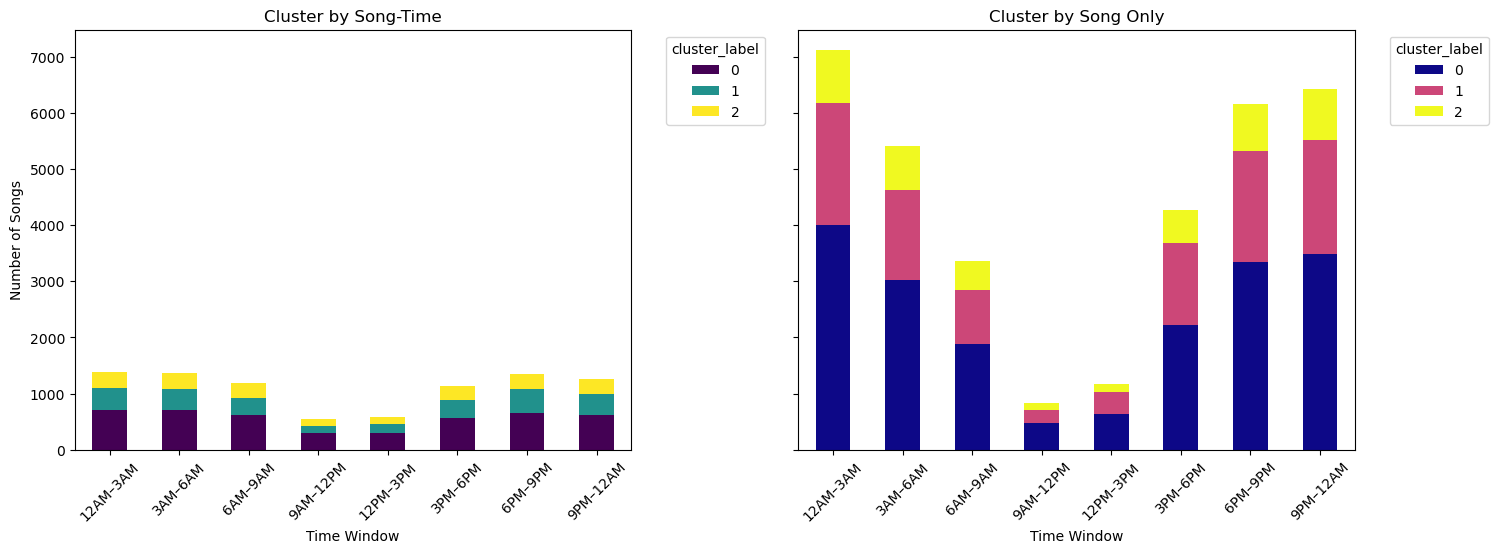

In [45]:
time_order = [
    '12AM–3AM',
    '3AM–6AM',
    '6AM–9AM',
    '9AM–12PM',
    '12PM–3PM',
    '3PM–6PM',
    '6PM–9PM',
    '9PM–12AM'
]

# --- Approach 1: (track_name, time_window) ---
df_agg1 = df.groupby(['track_name', 'time_window'])[numeric_cols].mean().reset_index()
df_agg1['cluster_label'] = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(
    StandardScaler().fit_transform(df_agg1[['energy','valence','tempo']])
)

df_agg1['time_window'] = pd.Categorical(df_agg1['time_window'], categories=time_order, ordered=True)
bar1 = (
    df_agg1.groupby(['time_window', 'cluster_label'])
    .size()
    .unstack()
    .reindex(time_order)
)

# --- Approach 2: track_name only ---
df_song = df.groupby('track_name')[numeric_cols].mean().reset_index()
df_song['cluster_label'] = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(
    StandardScaler().fit_transform(df_song[['energy','valence','tempo']])
)

df_with_clusters = df.merge(df_song[['track_name', 'cluster_label']], on='track_name')
df_with_clusters['time_window'] = pd.Categorical(df_with_clusters['time_window'], categories=time_order, ordered=True)

bar2 = (
    df_with_clusters.groupby(['time_window', 'cluster_label'])
    .size()
    .unstack()
    .reindex(time_order)
)

# --- side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

bar1.plot(
    kind='bar', stacked=True, ax=axes[0], colormap='viridis', legend=True, title='Cluster by Song-Time'
)
bar2.plot(
    kind='bar', stacked=True, ax=axes[1], colormap='plasma', legend=True, title='Cluster by Song Only'
)

for ax in axes:
    ax.set_xlabel('Time Window')
    ax.set_ylabel('Number of Songs')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='cluster_label', loc='upper left', bbox_to_anchor=(1.05, 1))

# adjusting layout
plt.subplots_adjust(left=0.08, right=0.88, bottom=0.2, top=0.9, wspace=0.3)
plt.show()

Original shape: (34759, 28)
Aggregated (by song) shape: (2868, 12)


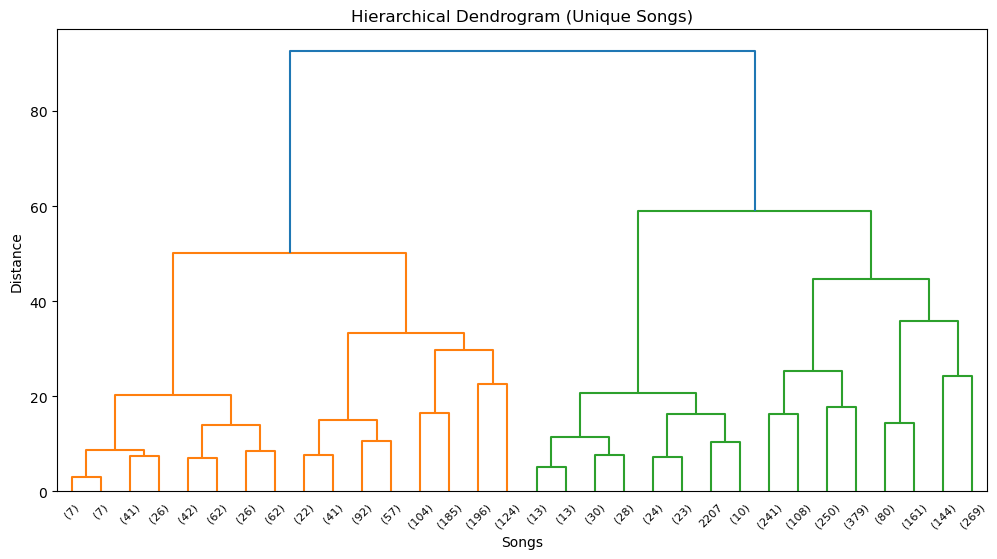

2 clusters -> Silhouette: 0.235, DB: 1.576
3 clusters -> Silhouette: 0.251, DB: 1.343
4 clusters -> Silhouette: 0.195, DB: 1.523
5 clusters -> Silhouette: 0.151, DB: 1.572


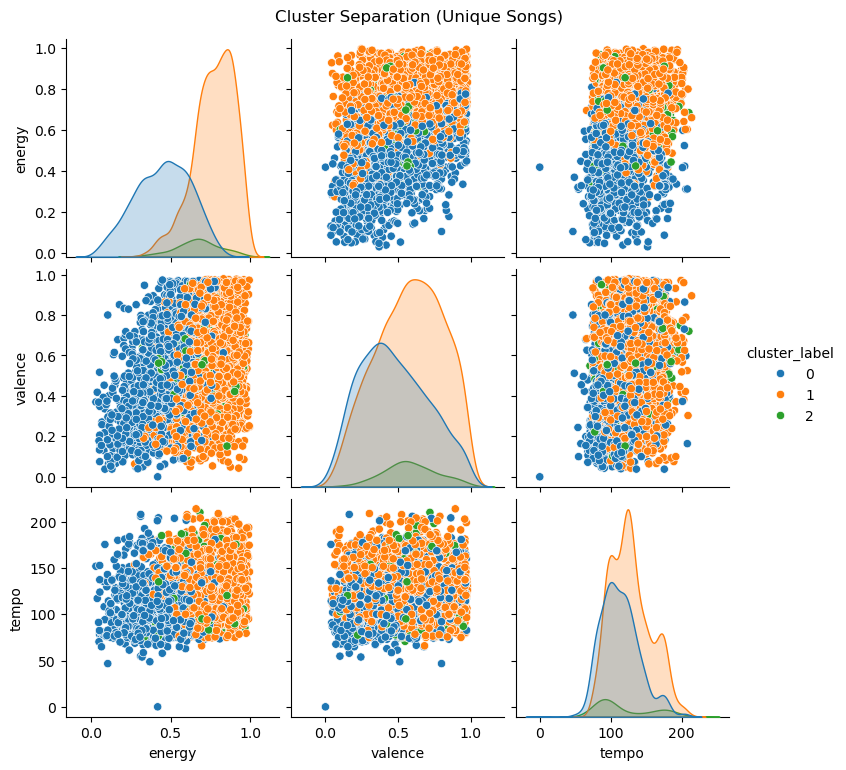

C:\Users\gaowe\AppData\Local\Temp\ipykernel_16876\795741264.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['time_window', 'cluster_label'])


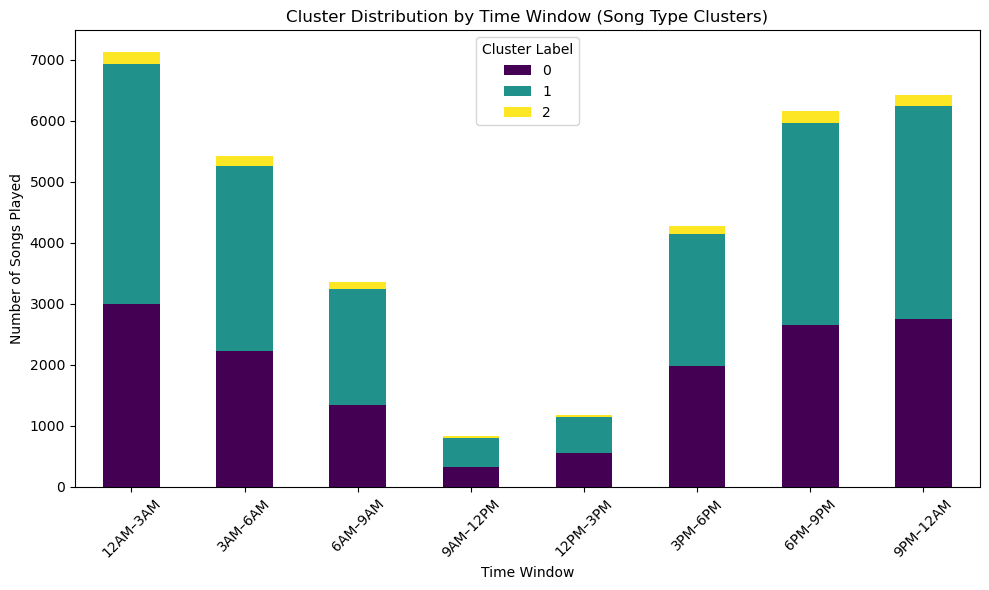

In [48]:
# step 1: agg by song (unique track_name only)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram

# numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# agg by song
df_song = df.groupby('track_name')[numeric_cols].mean().reset_index()

print("Original shape:", df.shape)
print("Aggregated (by song) shape:", df_song.shape)

# step 2: features for clustering
features = ['energy', 'loudness', 'speechiness',
            'acousticness', 'valence', 'tempo']

X_song = df_song[features]

# scale 
scaler = StandardScaler()
X_song_scaled = scaler.fit_transform(X_song)

# step 3: hierarchical clustering - ward
linked = linkage(X_song_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=4)
plt.title("Hierarchical Dendrogram (Unique Songs)")
plt.xlabel("Songs")
plt.ylabel("Distance")
plt.show()

# step 4: Evaluate different cluster counts
for k in [2, 3, 4, 5]:
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agglo.fit_predict(X_song_scaled)
    sil = silhouette_score(X_song_scaled, labels)
    db = davies_bouldin_score(X_song_scaled, labels)
    print(f"{k} clusters -> Silhouette: {sil:.3f}, DB: {db:.3f}")

k_best = 3
agglo_final = AgglomerativeClustering(n_clusters=k_best, linkage='ward')
df_song['cluster_label'] = agglo_final.fit_predict(X_song_scaled)

# step 5: merge clusters back into original df
df_with_clusters = df.merge(
    df_song[['track_name', 'cluster_label']],
    on='track_name',
    how='left'
)

# step 6: visualize cluster separation
sns.pairplot(
    df_song,
    vars=['energy', 'valence', 'tempo'],
    hue='cluster_label',
    palette='tab10'
)
plt.suptitle("Cluster Separation (Unique Songs)", y=1.02)
plt.show()

# step 7: cluster distribution over time
time_order = [
    '12AM–3AM', '3AM–6AM', '6AM–9AM', '9AM–12PM',
    '12PM–3PM', '3PM–6PM', '6PM–9PM', '9PM–12AM'
]

df_with_clusters['time_window'] = pd.Categorical(
    df_with_clusters['time_window'],
    categories=time_order,
    ordered=True
)

cluster_time_counts = (
    df_with_clusters
    .groupby(['time_window', 'cluster_label'])
    .size()
    .unstack(fill_value=0)
    .reindex(time_order)
)

# ordered stacked bar chart
ax = cluster_time_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis'
)

plt.title('Cluster Distribution by Time Window (Song Type Clusters)')
plt.xlabel('Time Window')
plt.ylabel('Number of Songs Played')
plt.xticks(rotation=45)
plt.legend(title='Cluster Label')
plt.tight_layout()
plt.show()